**Вступление**

В данном проекте я буду рассматривать доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Основная задача заключается в выявлении определяющих успешность игр закономерностей. Результат этого исследования  позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Работа в проекте будет разделена на 3 раздела - предобработка данных, исследовательский анализ и статистический анализ данных. В конце будут определены основные тезисы проекта и озвучены выводы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

In [5]:
data = pd.read_csv('games.csv')

In [7]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Предобработка данных**

1) Приводим столбцы к нижнему регистру

In [10]:
 data.columns = map(str.lower, data.columns)

2) Смотрим данные

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


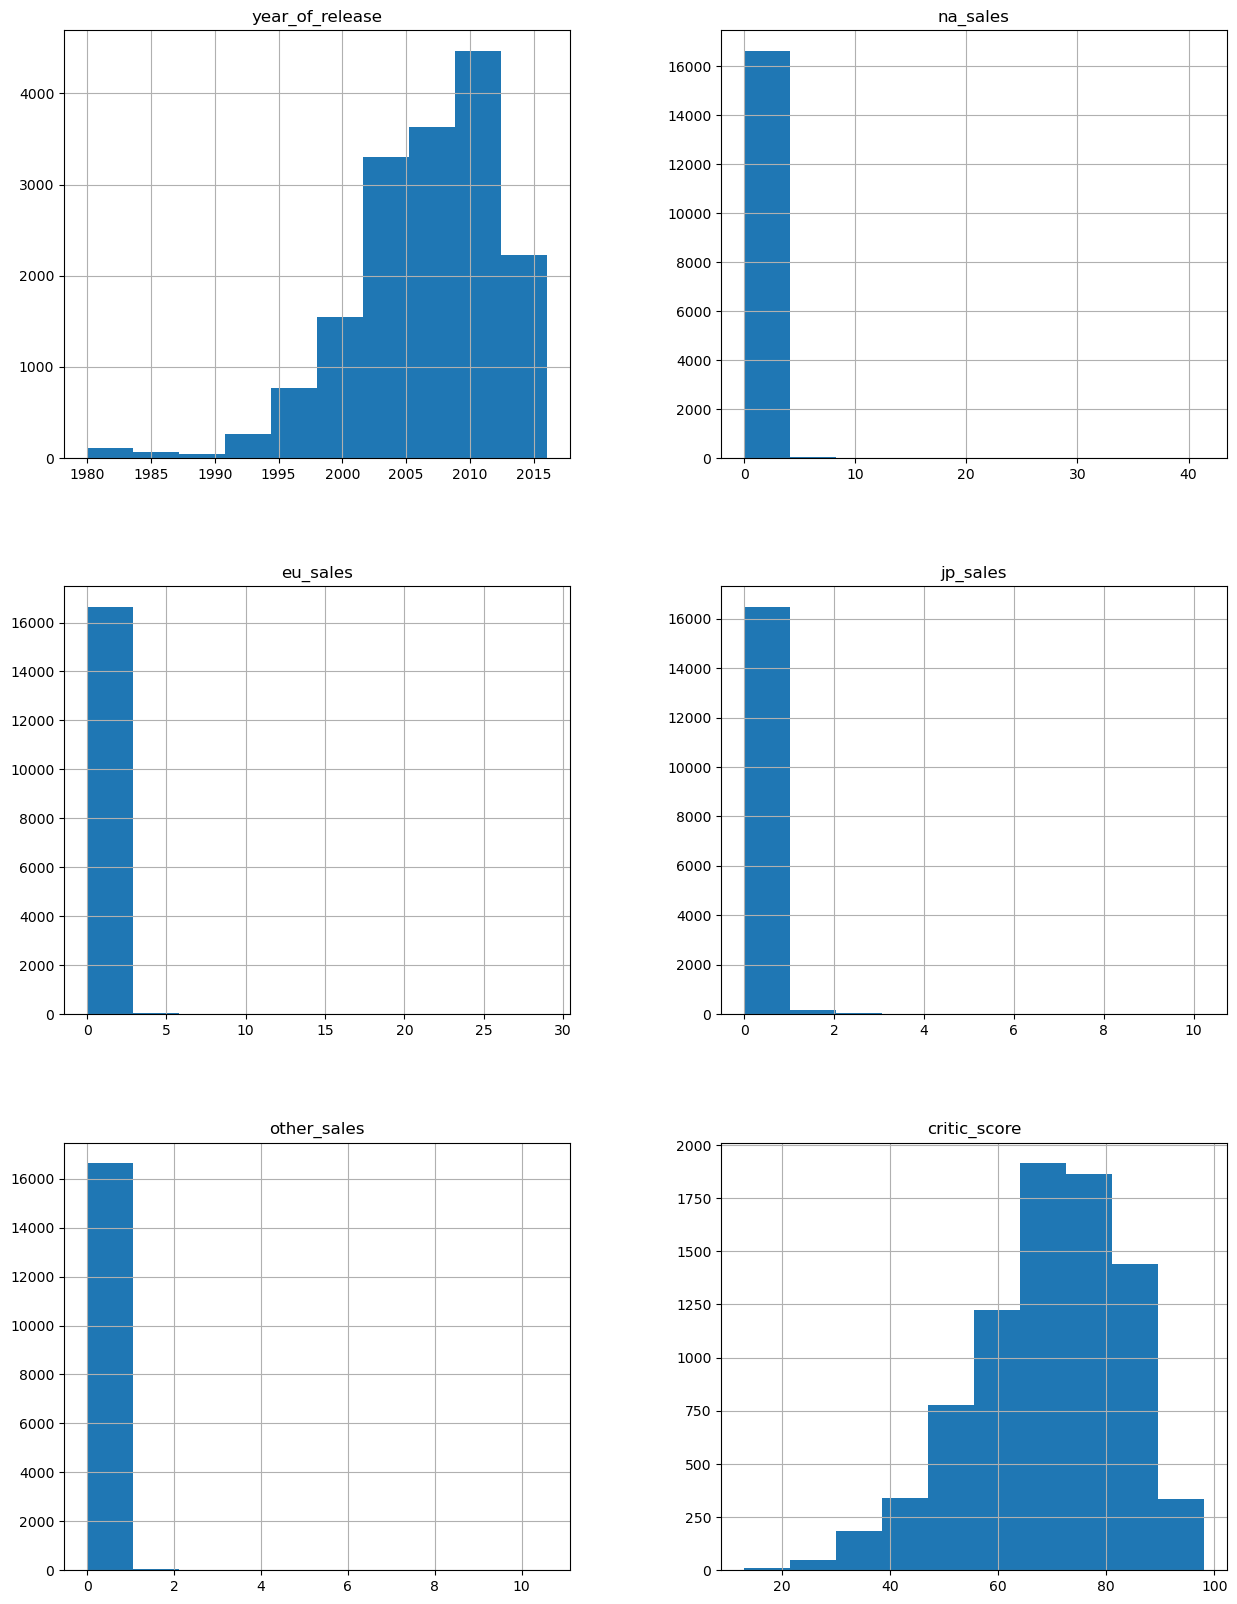

In [12]:
data.hist(figsize=(15, 20));

После ознакомления с данными, можно сделать вывод, о наличии пропусков, также для некоторых столбцов нужно изменить тип данных и убрать аномальные значения.

Вначале поменяем тип данных там где это требуется. 


In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [14]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Удаляем столбцы без навания игры

In [16]:
data = data[data['name'].notna()]

2) year_of_release

In [17]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [18]:
data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [19]:
data = data[data['year_of_release'].notna()]

In [20]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [21]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

3) critic_score

In [22]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [23]:
data['critic_score'] = data['critic_score'].fillna(0)

In [24]:
data['critic_score'] = data['critic_score'].astype('int')

4) user_score

In [25]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [26]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,tbd,E


Значения 'tbd' это просто отсутсвующий рейтинг. Заменим это значение на 'NaN'

Изменим тип столбца в числовой тип float

In [27]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

In [28]:
data['user_score'] = data['user_score'].fillna(0)

In [29]:
data['user_score'].unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

5) rating 

In [30]:
data['rating'] = data['rating'].fillna('Unknown')

Оценки критиков и пользователей это вещественный признак, поэтому заменив здесь пустые значения на 0, я буду следить за ними, чтобы не был искажен анализ в дальнейшем.

<strong>Поиск аномальных значений</strong>

Создадим столбец Total_sales и аккумулируем тут все продажи

In [31]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Ищем аномальные значения для этого столбца

(0.0, 1.5)

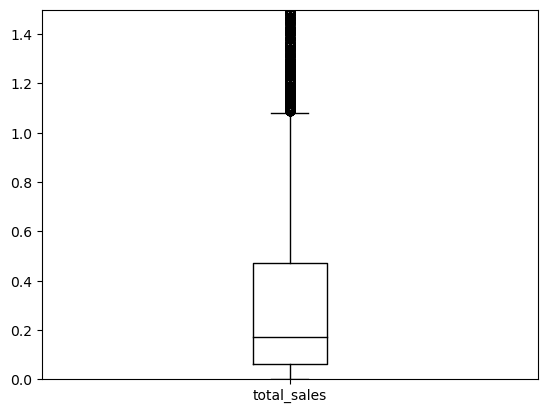

In [32]:
data.boxplot(column=['total_sales'], grid= False , color='black')
plt.ylim(0,1.5)

In [33]:
data[data['total_sales'] > 1.2]['total_sales'].count()

1654

В этом примере выбросами являются игры-хиты, самые популярные игры, которые продавались. Для многих студий эти хиты приносят значительную долю выручки, поэтому имеет смысл их оставить в анализе.

**Исследовательский анализ данных**

1) Посмотрим сколько игр выпускалось в разные годы.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


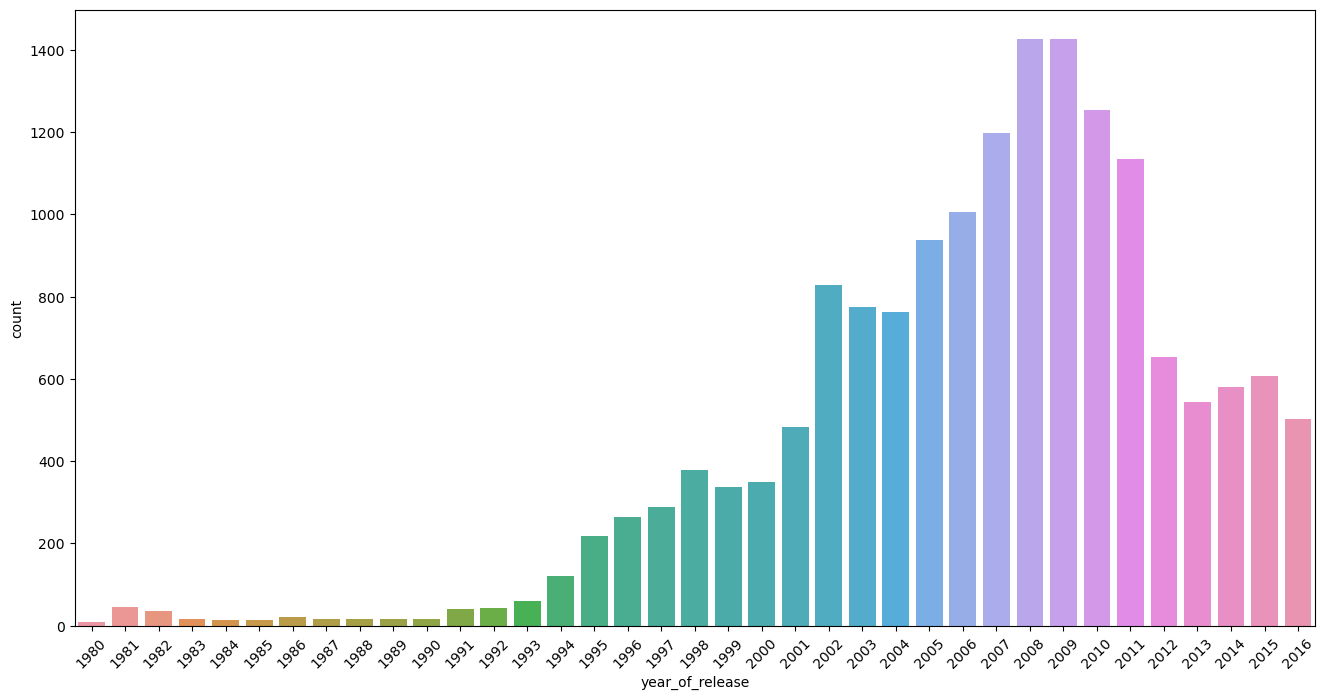

In [36]:
plt.figure(figsize = (16,8))
sns.countplot(x=data["year_of_release"])
plt.xticks(rotation=45);

(2015.0, 1990.0)

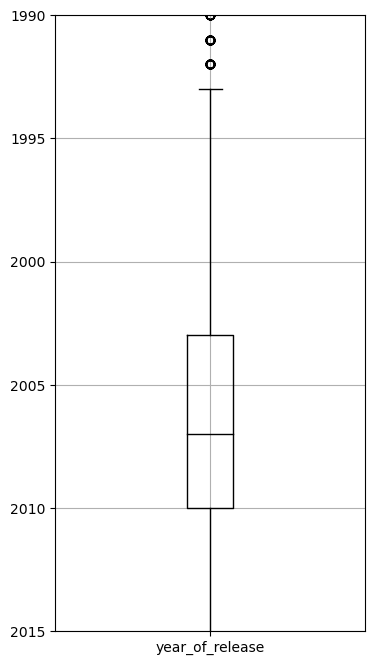

In [37]:
data.boxplot(column=['year_of_release'], color='black',figsize=(4, 8))
plt.ylim(2015, 1990)

Мы можем сделать вывод, что игры вышедшие до 1993 не важны для исследования и являются выбросами данных. Удалим эти данные.

In [39]:
data = data[data['year_of_release'] > 1993]

2)Изучим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Это позволит определить за какой характерный срок появляются новые и исчезают старые платформы.

In [40]:
sales_rating = data.groupby('platform')['total_sales'].sum()

In [41]:
sales_rating.sort_values(ascending = False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

In [42]:
data_rating = data.pivot_table(index = ['year_of_release'],columns='platform',values = 'total_sales',aggfunc = 'sum')

In [43]:
data_rating.columns

Index(['3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'N64', 'NES', 'NG',
       'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD',
       'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'],
      dtype='object', name='platform')

Оставляем данные 10 самых продаваемых платформ

In [44]:
data_rating = data_rating.drop(columns=['3DO','DC','GB','GC', 'GEN','N64',
       'NES', 'NG', 'PC', 'PCFX','PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS','WiiU','XB',
       'XOne'])

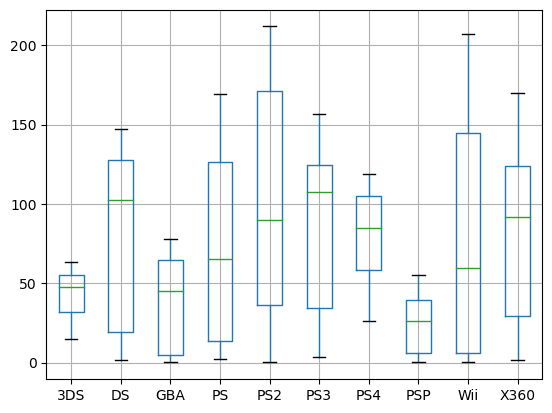

In [45]:
data_rating.boxplot();

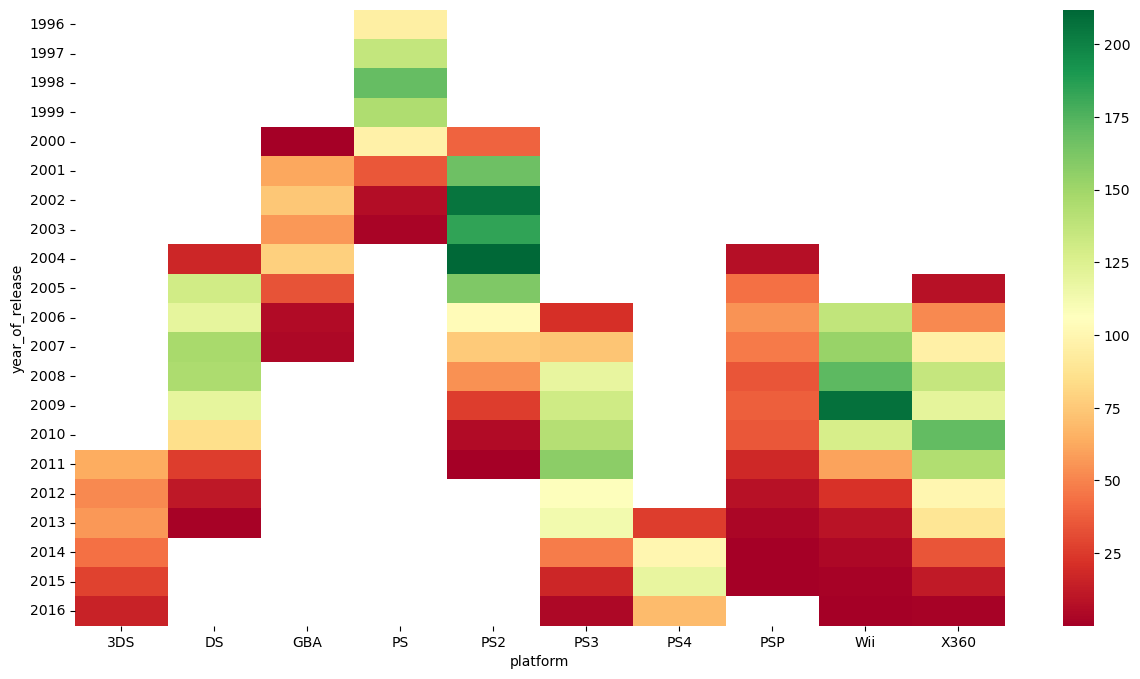

In [46]:
plt.figure(figsize = (15,8))
sns.heatmap(data_rating.query('year_of_release > 1995'),cmap = 'RdYlGn');

In [47]:
mean_data = pd.DataFrame(data.groupby('platform')['year_of_release'].nunique())
mean_data.sort_values(by = 'year_of_release',ascending = False)

,year_of_release
platform,
PC,23
PS2,12
PSP,12
X360,12
Wii,11
PS3,11
DS,10
PS,10
XB,9


In [48]:
mean_data.describe()

,year_of_release
count,29.000000
mean,6.793103
std,4.813518
min,1.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,23.000000


В среднем платформы актуальны в пределах 7.5 лет, если брать всю выборку

In [49]:
mean_data_top = data_rating.groupby('year_of_release').nunique().sum()
mean_data_top.sort_values(ascending = False)

platform
PS2     12
PSP     12
X360    12
PS3     11
Wii     11
DS      10
PS      10
GBA      8
3DS      6
PS4      4
dtype: int64

In [50]:
mean_data_top.describe()

count    10.00000
mean      9.60000
std       2.75681
min       4.00000
25%       8.50000
50%      10.50000
75%      11.75000
max      12.00000
dtype: float64

Самые популярные платформы актуальны около 10 лет.

Создадим DataFrame actual_data, и будем использовать его для построения прогноза на 2017 год. Данные за предыдущие годы далее в работе использовать не будем.

In [51]:
actual_data = data[data['year_of_release'] > 2013]

4)Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [52]:
actual_data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [53]:
actual_rating = actual_data.pivot_table(index = ['year_of_release'],columns='platform',values = 'total_sales',aggfunc = 'sum')

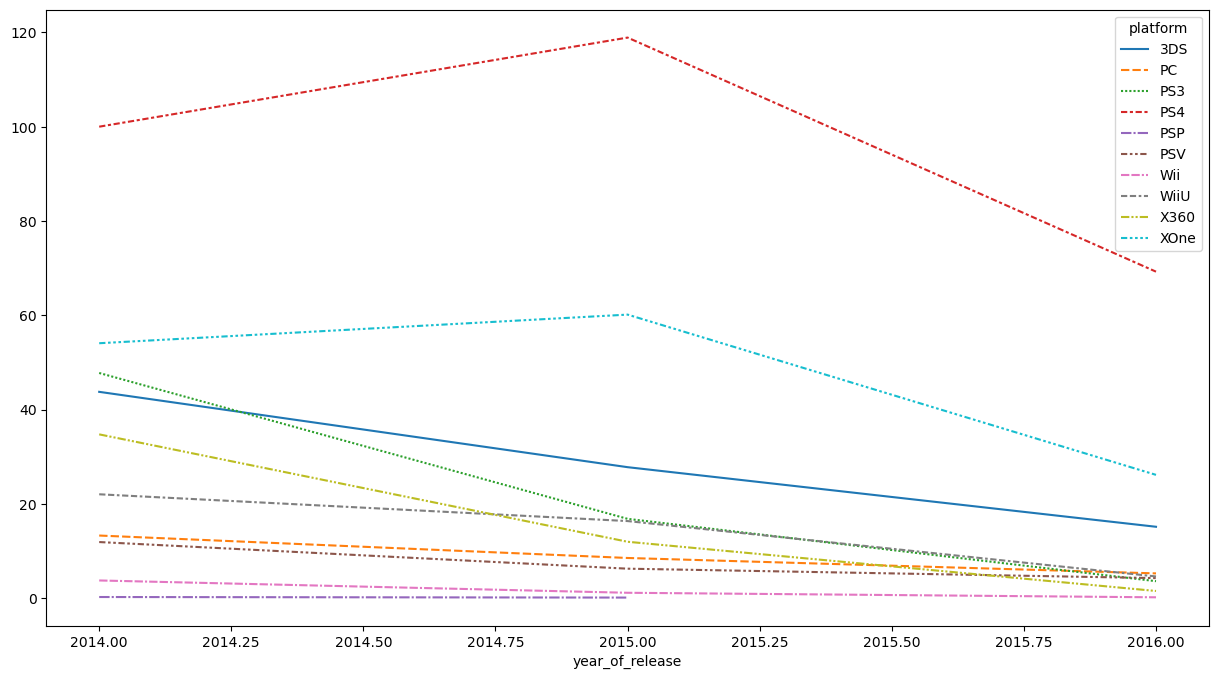

In [54]:
plt.figure(figsize = (15,8))
sns.lineplot(data=actual_rating);

На этом графике мы видим продажи актуальных 10 платформ. В 2016 году они уже далеко от своего пика.

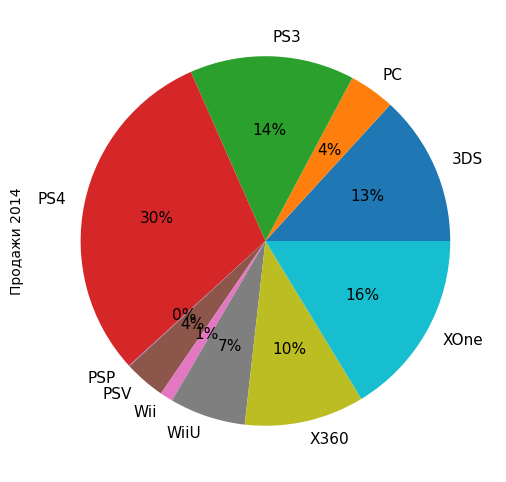

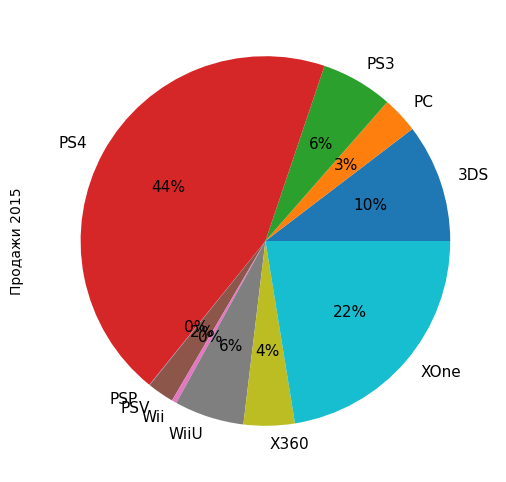

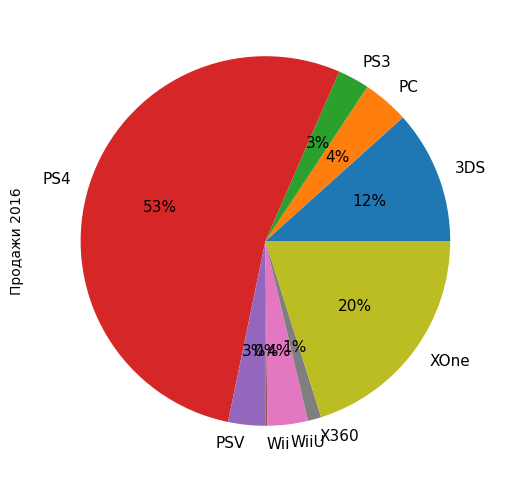

In [58]:

actual_data.query('year_of_release == 2014').groupby(['platform']).sum().plot(kind='pie', 
                                                                              y='total_sales',
                                                                              autopct='%1.0f%%',
                                                                              figsize=(6, 6),
                                                                              fontsize=11,
                                                                              legend="",
                                                                              label='Продажи 2014'
                                                                              )

actual_data.query('year_of_release == 2015').groupby(['platform']).sum().plot(kind='pie', 
                                                                              y='total_sales',
                                                                              autopct='%1.0f%%',
                                                                              figsize=(6, 6),
                                                                              fontsize=11,
                                                                              legend='',
                                                                              label='Продажи 2015'
                                                                             );

actual_data.query('year_of_release == 2016').groupby(['platform']).sum().plot(kind='pie', 
                                                                              y='total_sales',
                                                                              autopct='%1.0f%%',
                                                                              figsize=(6, 6),
                                                                              fontsize=11,
                                                                              legend="",
                                                                              label='Продажи 2016'
                                                                              );

Продажи всех платформ за анализируемы период падают. Больше всего продаются XOne и PS4. Доля продаж PS4 растет быстрее, чем у своего ближайшего конкурента - XOne

5)Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам.

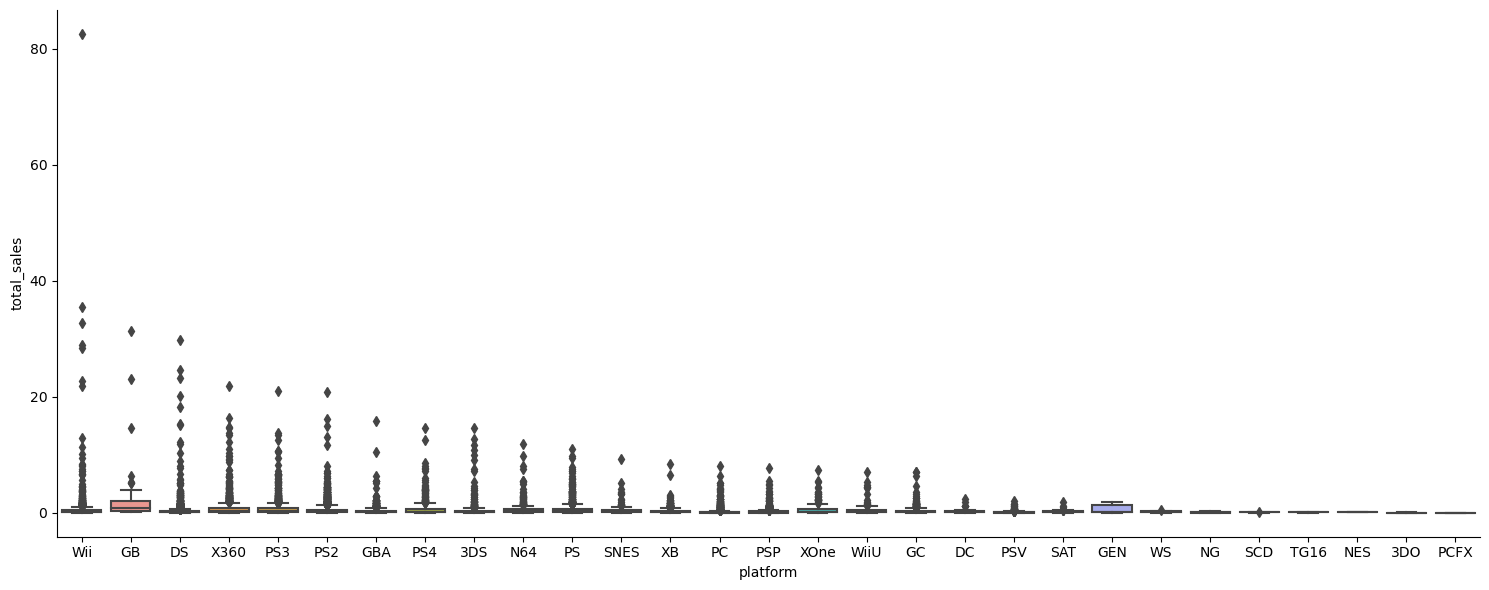

In [59]:
sns.catplot(x='platform',
            y='total_sales',
            kind='box',
            data=data,
 height= 6 , aspect= 2.5);


Здесь мы видим график глобальных продаж игр в разбивке по платформам. Для более четкой визуализации мы отделим выбросы данных с помощью параметра showfliers=False.

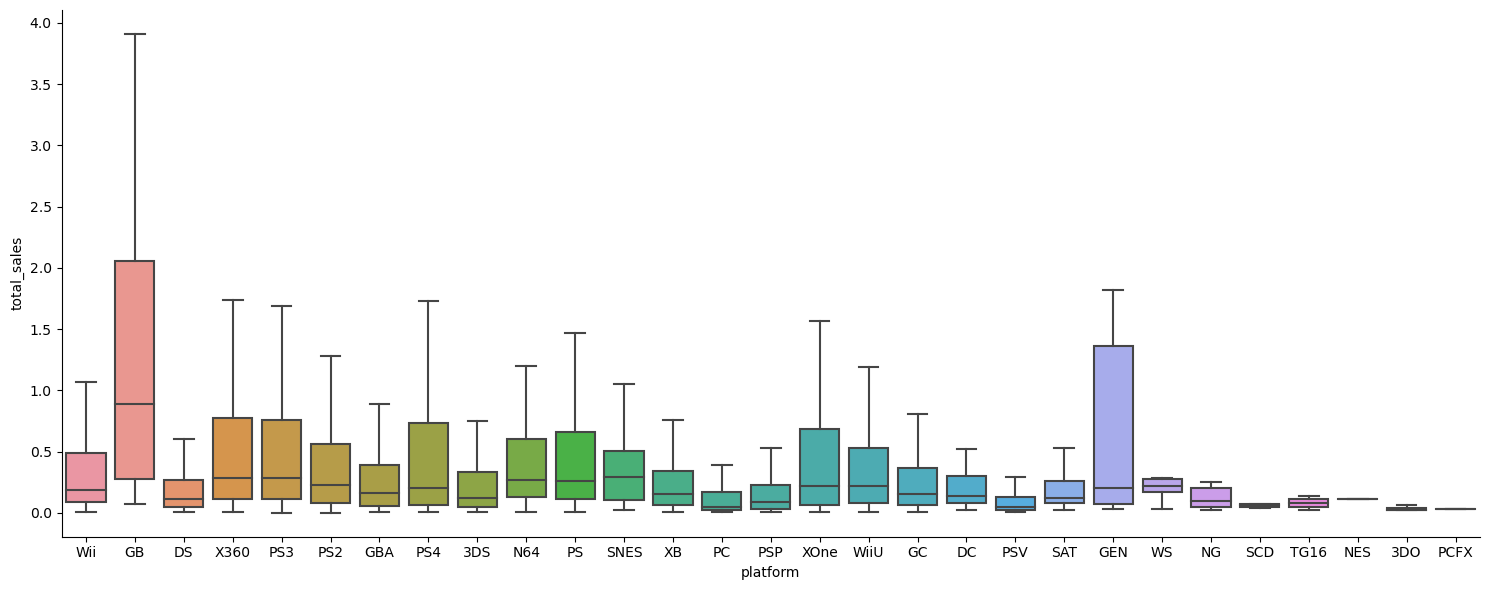

In [60]:
sns.catplot(x='platform',
            y='total_sales',
            kind='box',
            data=data,showfliers=False,
 height= 6 , aspect= 2.5);


In [61]:
data.groupby('platform')['total_sales'].median().sort_values(ascending=False)

platform
GB      0.890
SNES    0.295
X360    0.280
PS3     0.280
N64     0.270
PS      0.260
PS2     0.230
WiiU    0.220
XOne    0.220
WS      0.215
GEN     0.200
PS4     0.200
Wii     0.190
GBA     0.160
XB      0.150
GC      0.150
DC      0.135
SAT     0.120
3DS     0.120
DS      0.110
NES     0.110
NG      0.100
PSP     0.090
TG16    0.080
SCD     0.060
PSV     0.050
PC      0.050
PCFX    0.030
3DO     0.020
Name: total_sales, dtype: float64

На глобальной выборке без выбросов данных самые стабильные продажи показывала платформа GB. 

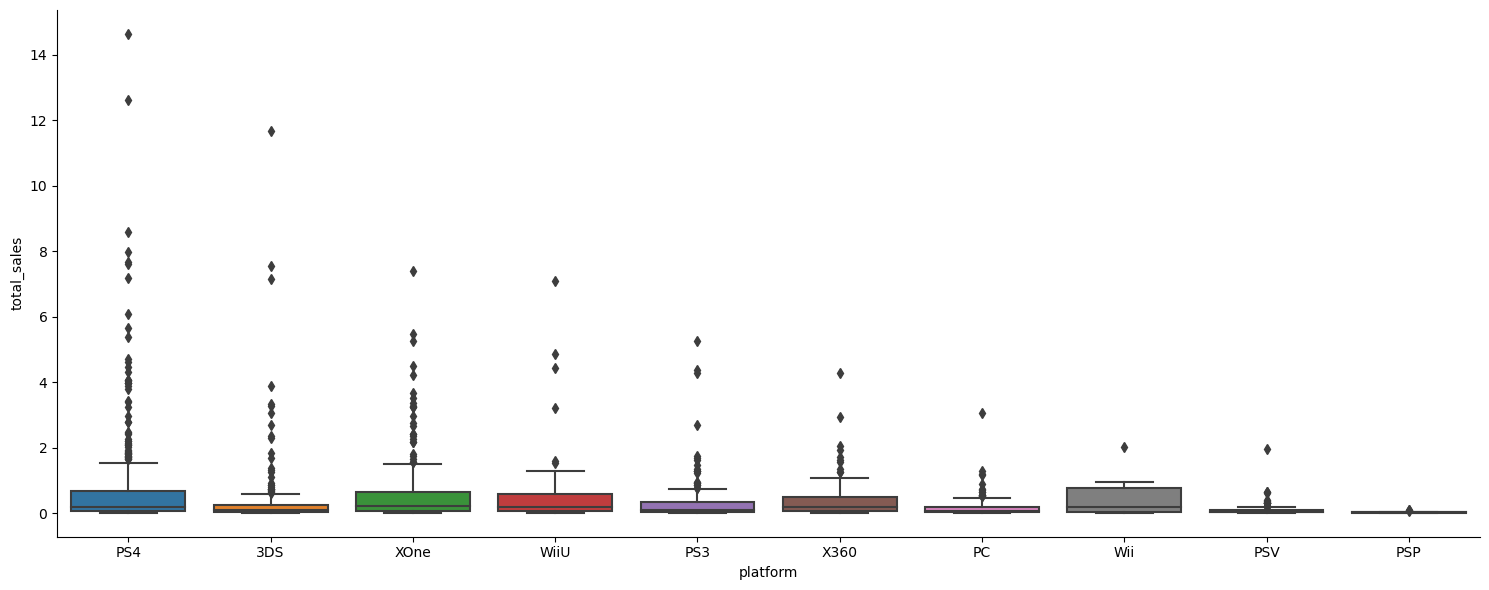

In [62]:
sns.catplot(x='platform',
            y='total_sales',
            kind='box',
            data=actual_data,
 height= 6 , aspect= 2.5);


На этом графике мы видим, что на PS4 выходит больше всего топовых игр с наибольшими продажами

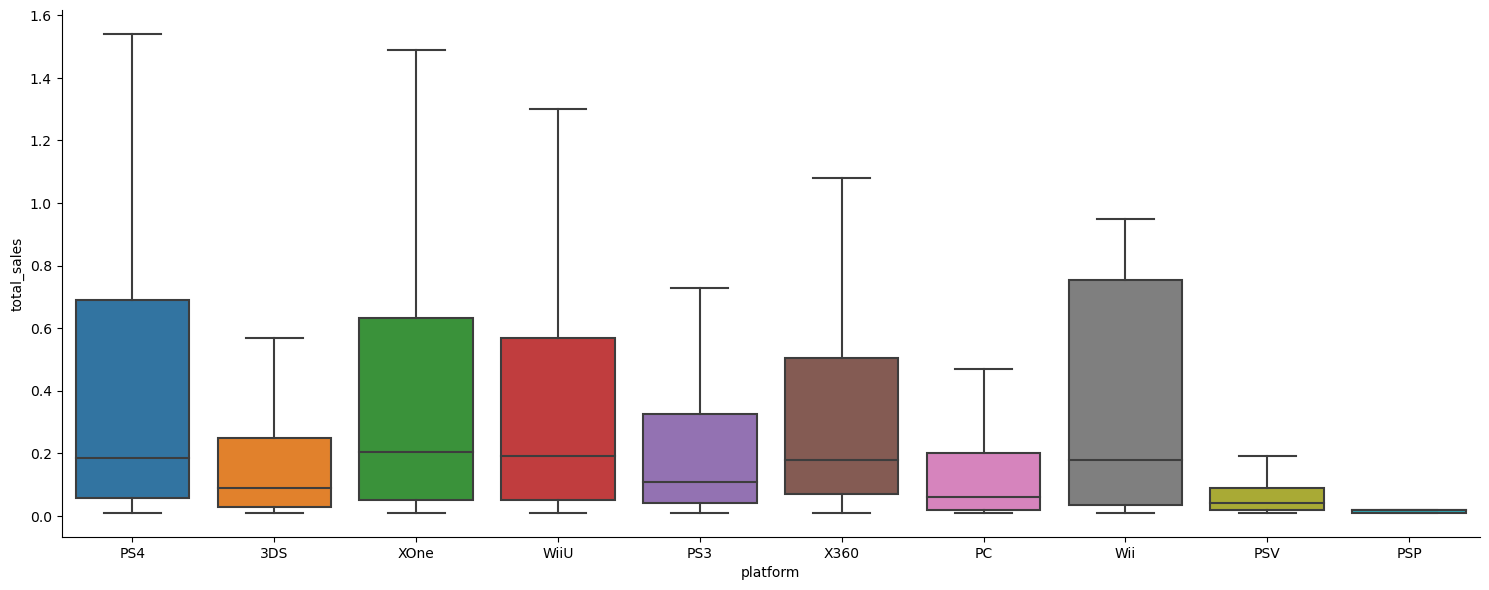

In [63]:
sns.catplot(x='platform',
            y='total_sales',
            kind='box',
            data=actual_data,showfliers=False,
 height= 6 , aspect= 2.5);


In [64]:
actual_data.groupby('platform')['total_sales'].median().sort_values(ascending=False)

platform
XOne    0.205
WiiU    0.190
PS4     0.185
Wii     0.180
X360    0.180
PS3     0.110
3DS     0.090
PC      0.060
PSV     0.040
PSP     0.020
Name: total_sales, dtype: float64

Если рассматривать актуальную выборку платформ, то XOne показывает бОльшую стабильность, что не является хорошим фактором в условиях такого конкурентного рынка.

6)Далее изучим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируйте выводы.

In [65]:
critic_data = actual_data.query('platform == "PS3" and critic_score != 0')

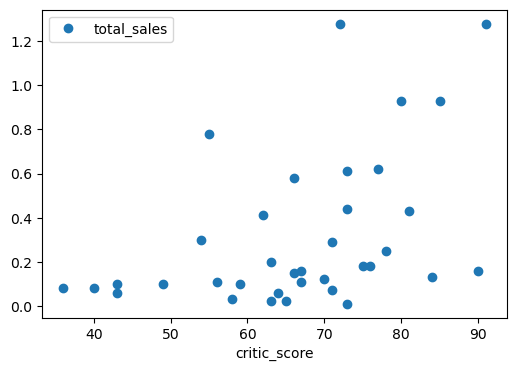

In [66]:
critic_data.plot(x='critic_score',y='total_sales',figsize=(6,4),sharex =False,style='o');

In [67]:
critic_data['total_sales'].corr(critic_data['critic_score'])

0.44657460493190704

In [68]:
user_data = actual_data.query('platform == "PS3" and user_score != 0')

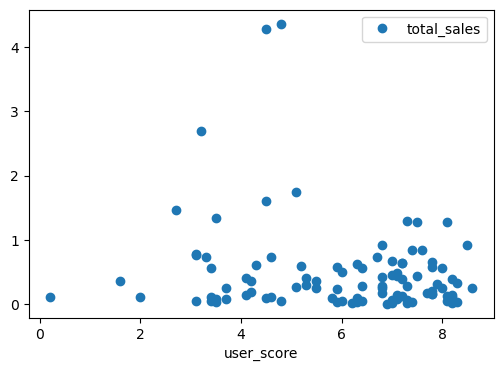

In [69]:
user_data.plot(x='user_score',y='total_sales',figsize=(6,4),sharex =False,style='o');

In [70]:
user_data['total_sales'].corr(user_data['user_score'])

-0.16676141347662116

Отзывы критиков влияют на продажи PS3 больше чем отзывы пользователей. Также корреляция критиков имеет умеренную связь с продажами, а отзывы пользователей - незначительный фактор продаж.

7) Соотнесите выводы с продажами игр на других платформах.

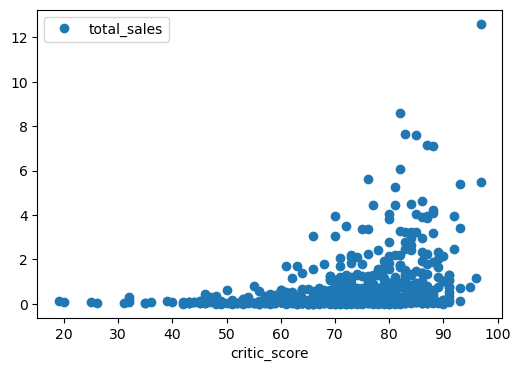

In [71]:
critic_data_all = actual_data.query('critic_score != 0')
critic_data_all.plot(x='critic_score',y='total_sales',figsize=(6,4),sharex =False,style='o');

In [72]:
critic_data_all['total_sales'].corr(critic_data_all['critic_score'])

0.3281050869663632

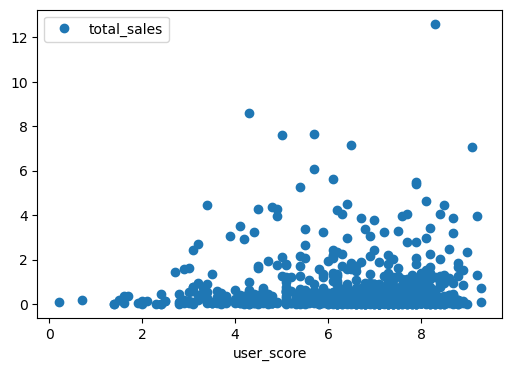

In [73]:
user_data_all = actual_data.query('user_score != 0')
user_data_all.plot(x='user_score',y='total_sales',figsize=(6,4),sharex =False,style='o');

In [74]:
user_data_all['total_sales'].corr(user_data_all['user_score'])

-0.01307030500248456

Если смотреть все игры, то корреляция продаж с отзывами незначительная.

Рассмотрим корреляцию оценок для самых актуальных платформ  XOne, PS4, PC

1)XOne

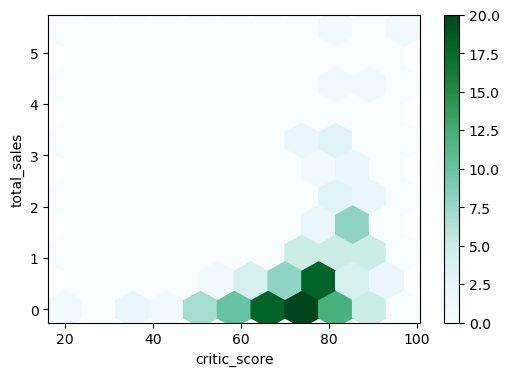

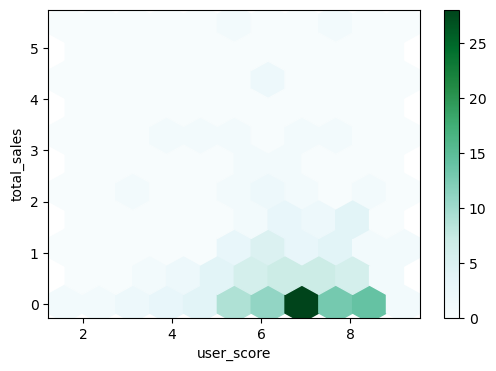

In [75]:
critic_data_xone = actual_data.query('platform == "XOne" and critic_score != 0')
critic_data_xone.plot(x='critic_score',y='total_sales',figsize=(6,4),sharex =False,style='o', kind='hexbin', gridsize=10);

user_data_xone = actual_data.query('platform == "XOne" and user_score != 0')
user_data_xone.plot(x='user_score',y='total_sales',figsize=(6,4),sharex =False,style='o', kind='hexbin', gridsize=10);

In [76]:
print('Корреляция критиков:')
print(critic_data_xone['total_sales'].corr(critic_data_xone['critic_score']))
print('Корреляция пользователей:')
print(user_data_xone['total_sales'].corr(user_data_xone['user_score']))

Корреляция критиков:
0.42867694370333226
Корреляция пользователей:
-0.0703839280647581


2)PS4

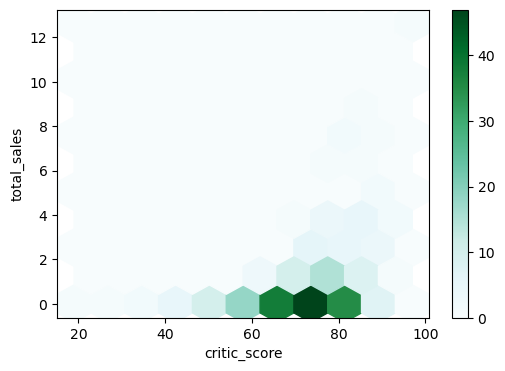

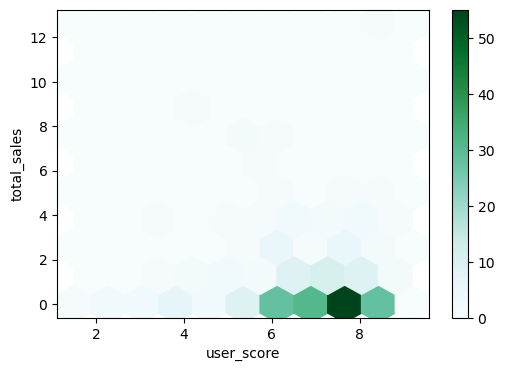

In [77]:
critic_data_ps4 = actual_data.query('platform == "PS4" and critic_score != 0')
critic_data_ps4.plot(x='critic_score',y='total_sales',figsize=(6,4),sharex =False,style='o', kind='hexbin', gridsize=10);

user_data_ps4 = actual_data.query('platform == "PS4" and user_score != 0')
user_data_ps4.plot(x='user_score',y='total_sales',figsize=(6,4),sharex =False,style='o', kind='hexbin', gridsize=10);

In [78]:
print('Корреляция критиков:')
print(critic_data_ps4['total_sales'].corr(critic_data_ps4['critic_score']))
print('Корреляция пользователей:')
print(user_data_ps4['total_sales'].corr(user_data_ps4['user_score']))

Корреляция критиков:
0.40266141068104083
Корреляция пользователей:
-0.040131589472697356


3)PC

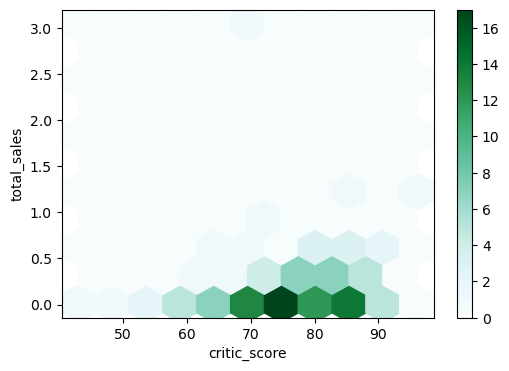

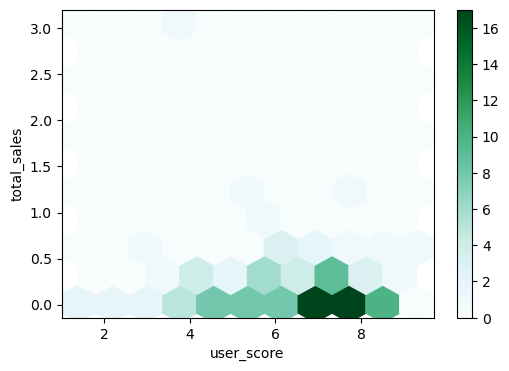

In [79]:
critic_data_pc = actual_data.query('platform == "PC" and critic_score != 0')
critic_data_pc.plot(x='critic_score',y='total_sales',figsize=(6,4),sharex =False,style='o', kind='hexbin', gridsize=10);

user_data_pc = actual_data.query('platform == "PC" and user_score != 0')
user_data_pc.plot(x='user_score',y='total_sales',figsize=(6,4),sharex =False,style='o', kind='hexbin', gridsize=10);

In [80]:
print('Корреляция критиков:')
print(critic_data_pc['total_sales'].corr(critic_data_pc['critic_score']))
print('Корреляция пользователей:')
print(user_data_pc['total_sales'].corr(user_data_pc['user_score']))

Корреляция критиков:
0.17463413769350036
Корреляция пользователей:
-0.07159665703472452


Если смотреть 3 самые актуальные платформы, то можно сделать вывод, что оценки пользователей не влияют на продажи. Самые продаваемые платформы PS4 и Xone показывают умеренную корреляцию оценок критиков и продаж.

7)Далее следует общее распределение игр по жанрам.

In [81]:
actual_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

Самый прибыльный жанр - Action, игры жанра Puzzle продаются меньше всего.

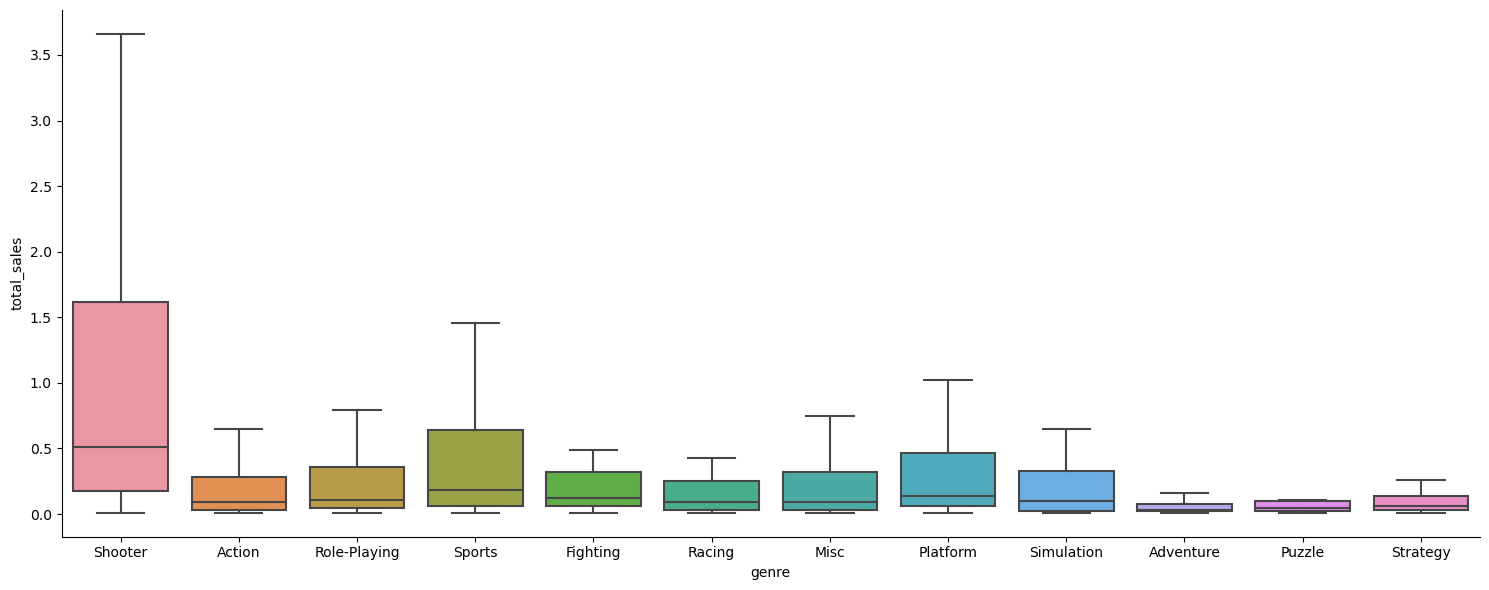

In [82]:
sns.catplot(x='genre',
            y='total_sales',
            kind='box',
            data=actual_data,showfliers=False,
 height= 6 , aspect= 2.5);

In [83]:
actual_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

Если отталкиваться от медианных значений и данных без выбросов, то получается, что стабильнее всего продаются игры в жанре 'Platform', 'Sports' и стабильнее всего жанр 'Shooter'

**Определяем портрет пользователя каждого региона**
<br>
    <br>Для пользователя каждого региона (NA, EU, JP):
   <br> Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    <br>Самые популярные жанры (топ-5). Поясняем разницу.
   <br> Влияние рейтинга ESRB на продажи в отдельном регионе
   <br>

1) NA_sales — продажи в Северной Америке

In [84]:
NA_platform = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
NA_platform = NA_platform.drop(NA_platform.index[5:])
NA_platform

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

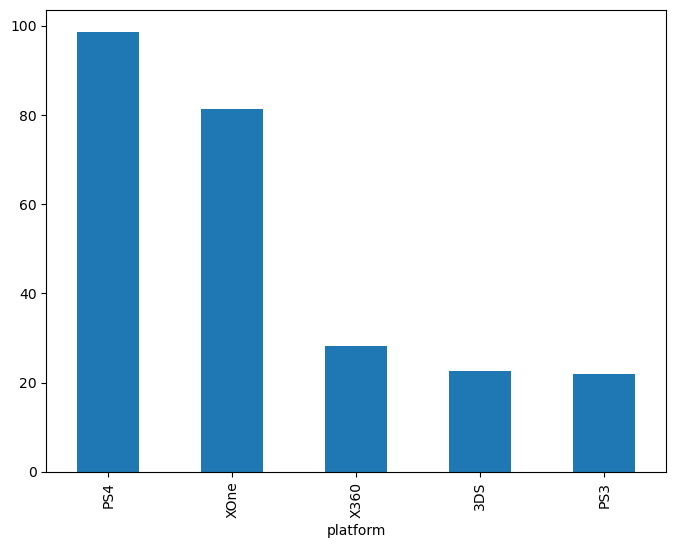

In [85]:
NA_platform.plot(kind='bar', y='na_sales',figsize = (8,6));

Если рассматривать актуальный период, то PS4 продается лучше всего в регионе, XOne с небольшим отставанием

In [86]:
actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
Name: na_sales, dtype: float64

Самые популярные жанры как и во всем Мире - Action и Shooter

In [87]:
actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M          96.42
Unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

Больше всего продаж у рейтинга «M» («Mature») 

2) eu_sales — продажи в Европе

In [88]:
eu_platform = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_platform = eu_platform.drop(eu_platform.index[5:])
eu_platform

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

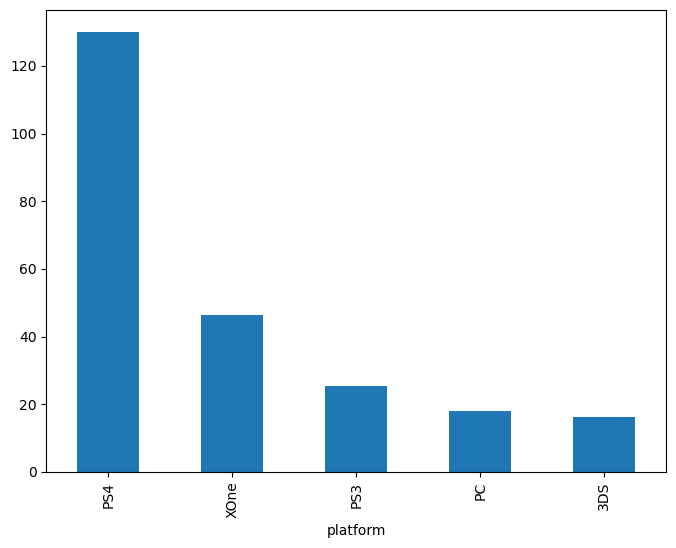

In [89]:
eu_platform.plot(kind='bar', y='eu_sales',figsize = (8,6));

В Европе playstation4 значительно чаще покупают 

In [90]:
actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Misc            12.86
Simulation       7.30
Platform         6.80
Fighting         6.69
Adventure        6.49
Strategy         1.79
Puzzle           0.52
Name: eu_sales, dtype: float64

Преобладают игровые жанры Action и Shooter

In [91]:
actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M          93.44
Unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

В Европе игры «M» («Mature»), продаются чаще, чем игры «E10+» («Everyone 10 and older»)

3) jp_sales — продажи в Японии

In [92]:
jp_platform = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_platform = jp_platform.drop(jp_platform.index[5:])
jp_platform

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

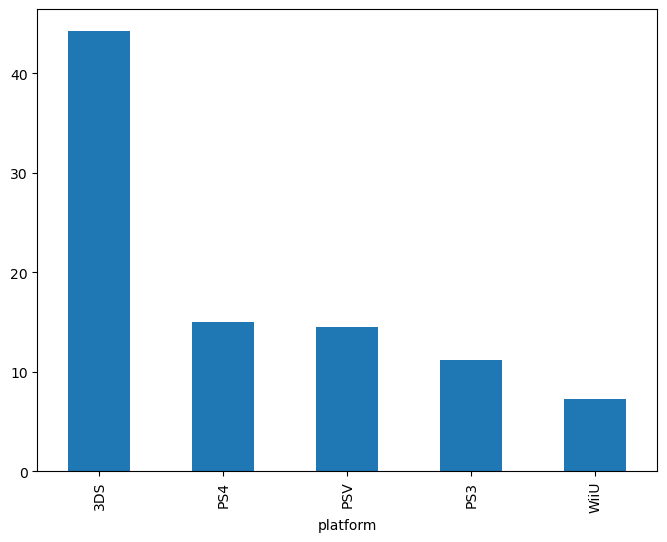

In [93]:
jp_platform.plot(kind='bar', y='jp_sales',figsize = (8,6));

В Японии преобладают продажи платформы 3DS это  портативная игровая система производства Nintendo. То есть японцы предпочитают играть вне дома.

In [94]:
actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Adventure        3.60
Sports           3.26
Platform         2.69
Simulation       2.31
Racing           1.76
Strategy         0.95
Puzzle           0.93
Name: jp_sales, dtype: float64

Япония также отличается самыми популярными жанрами - Role-Playing и Action 

In [95]:
actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
Unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

Преобладают игры с неопределенным рэйтингом. Возможно в Японии своя шкала оценки, или на платформу 3ds не распространяется этот рейтинг

<br>**Статистический анализ данных**
<br>**Проверка гипотез**

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [96]:
data_xone = actual_data.query('platform == "XOne" and user_score != 0')

In [97]:
data_pc = actual_data.query('platform == "PC" and user_score != 0')

In [98]:
#H0 -  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
#H1 -  Средние пользовательские рейтинги платформ Xbox One и PC отличаются


alpha = 0.05

results = st.ttest_ind(
   data_xone['user_score'], 
    data_pc['user_score'],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


In [99]:
data_xone.query('user_score != 0')['user_score'].mean()

6.594545454545453

In [100]:
data_pc.query('user_score != 0')['user_score'].mean()

6.298360655737703

Мы не отвергаем нулевую гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [101]:
data_action = actual_data.query('genre == "Action" and user_score != 0')

In [102]:
data_sports = actual_data.query('genre == "Sports" and user_score != 0')

In [103]:
#H0 -  Средние пользовательские рейтинги жанров Actio и Sports одинаковые
#H1 -  Средние пользовательские рейтинги жанров Action и Sports разные


alpha = 0.05

results = st.ttest_ind(
   data_action['user_score'], 
    data_sports['user_score'],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [104]:
data_action.query('user_score != 0')['user_score'].mean()

6.760606060606054

In [105]:
data_sports.query('user_score != 0')['user_score'].mean()

5.225196850393697

Гипотеза - "Средние пользовательские рейтинги жанров Action и Sports разные", которая озвучена в условии, верна. Нулевая гипотеза отвергнута.

**Общий вывод**

<br>В этом проекте я исследовал исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Архив изначально содержал ряд проблем в данных, таких как: неверный тип данных, пропуски и аномальные значения, которые могут отразиться на общей структуре исследования. После предобработки данных были устранены все возможные проблемы, а также удалены выбросы в данных, которые составили примерно 10% от изначального объема объявлений. Для точности исследования был посчитан и добавлен в таблицу новый столбец total_sales
        
<br> Далее был проведен анализ данных. Основные тезисы этой работы:
<br>
<br> - Игры вышедшие до 1993 не важны для исследования и являются выбросами данных
<br> - В среднем платформы актуальны в пределах 7.5 лет, если брать всю выборку
<br> - Самые популярные платформы актуальны около 10 лет.
<br> - Лидеры продаж PS2,PS3,DS,X360,PS,WII
<br> - Если рассматривать потенциально прибыльные платформы и данные за последние 2 года, то больше всего продаж уPS4 и XOne.
<br> - Корреляция продаж с отзывами незначительная.
<br> - Оценка критиков больше влияет на продажи
<br> - Самый прибыльный жанр - Action, игры жанра Puzzle продаются меньше всего.
<br> - Стабильнее всего продаются игры в жанре 'Platform', 'Shooter' и 'Sports'

<br> Затем были составлены портреты пользователей по разным регионам:
<br>
<br> NA_sales — продажи в Северной Америке
<br>
<br> - PS4 продается лучше всего в регионе, XOne с небольшим отставанием
<br> - Самые популярные жанры как и во всем Мире - Action и Shooter
<br> - Больше всего продаж у рейтинга «M» («Mature»)
<br>
<br> EU_sales — продажи в Европе
<br>
<br> - В Европе PS4 значительно чаще покупают
<br> - Преобладают игровые жанры Action и Shooter
<br> - В Европе игры «M» («Mature»), продаются чаще, чем игры «E10+» («Everyone 10 and older»)
<br>
<br> JP_sales — продажи в Японии
<br>
<br> - В Японии преобладают продажи платформы 3DS это портативная игровая система производства Nintendo. То есть японцы предпочитают играть вне дома.
<br> - Япония также отличается самыми популярными жанрами - Role-Playing и Action
<br> - Преобладают игры с неопределенным рэйтингом. Возможно в Японии своя шкала оценки, или на платформу 3ds не распространяется этот рейтинг
<br>
<br> Далее были сформулированы 2 нулевые и альтернативные гипотезы:
<br>#H0 -  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br>#H1 -  Средние пользовательские рейтинги платформ Xbox One и PC отличаются
<br> В Ходе исследования нулевая гипотеза не была отвергнута 
<br>
<br>#H0 -  Средние пользовательские рейтинги жанров Action и Sports одинаковые
<br>#H1 -  Средние пользовательские рейтинги жанров Actio и Sports отличаются
<br>В Ходе исследования нулевая гипотеза была отвергнута 
<br>
<br>
<br>
<br>







<br>